### Data download and station selection

In [1]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
from obspy.clients.fdsn import RoutingClient
from obspy import Stream
from obspy.geodetics import gps2dist_azimuth
from obspy import signal

import matplotlib.pyplot as plt
import folium
import numpy as np

In [13]:
#noise measured for a period before Pn. For example Dtmin_Noise=-15 and Dtmax_Noise=-5 means noise is measured 15-5 seconds before Pn
#beware window length: taper for the first 2% of the trace, make sure it doesn't interfere with noise window.
# note that t_Pn starts at approx 40s

Dtmin_Noise=-25
Dtmax_Noise=-5
Dtmin_Pn=-5.
Dtmax_Pn=10.
Dtmin_Sn=-5.
Dtmax_Sn=10.

vLg_max=3.5
vLg_min=3.1
vLg=0.5*(vLg_max+vLg_min)

vPg=6.

tminCoda=300.
tmaxCoda=320.

In [14]:
#event choice
minlat = 37
maxlat = 50.0
minlon = -5
maxlon = 17
minmag = 3.5



event_name='Slovenia_2013'
event_name='Rhone Valley'
event_name='Friul_2013' 
event_name='Pyrenees_2012'
event_name='Spain_2_X7west'  #donnees tres bruites
event_name='Spain_3_X7west'
event_name='LaRochelle_X7west'
event_name='Spain_1_X7west'
event_name='Friul' 
event_name='Vierzon'
event_name='Bourg-en-Bresse' # SIGNAL PAS BON
event_name='Neuchatel_2024_04'
event_name='Prades_2024_06'# AUCUN SIGNAL
event_name='Pyrenees_2024_05'
event_name='Slovenia'
event_name='Appennines'
event_name='France_X7center'  
event_name='Genova' 
event_name='Adriatic' # a regarder
event_name='Massif Central' # a regarder




 
if event_name == 'Slovenia' :
    start = UTCDateTime("2024-03-27T21:06:00")   #Friul M4.5 event
    end = UTCDateTime("2024-03-27T22:08:00") #Friul M4.5 event
    
if event_name == 'Rhone Valley' :
    start = UTCDateTime("2019-11-11")   #rhone valley event
    end = UTCDateTime("2019-11-12") #rhone valley event

if event_name == 'Friul' :
    start = UTCDateTime("2024-03-27T21:06:00")   #Friul M4.5 event
    end = UTCDateTime("2024-03-27T22:08:00") #Friul M4.5 event

if event_name == 'Massif Central' :
    start = UTCDateTime("2022-05-09T11:11:00")   #massif central
    end = UTCDateTime("2022-05-09T11:16:00") #massif central M4.0

if event_name == 'Adriatic' :
    start = UTCDateTime("2022-11-09T06:06:00")   #Adriatic M5.6event
    end = UTCDateTime("2022-11-09T06:08:00") #Adriatic M5.6 event

if event_name == 'Appennines' :
    start = UTCDateTime("2022-02-01T22:06:00")   #Appennines M3.7 event
    end = UTCDateTime("2022-02-01T23:08:00") #Appennines M3.7 event

if event_name == 'Genova'  :
    start = UTCDateTime("2022-02-28") #Genova event
    end = UTCDateTime("2022-03-01")   #Genova event M4.0
    
if event_name == 'Friul_2013'  :
    start = UTCDateTime("2013-02-12") #Friul 2013 event M3.8
    end = UTCDateTime("2013-02-13")   #
    

if event_name == 'Pyrenees_2012'  :
    start = UTCDateTime("2012-12-30") #Pyrenees 2012 event M4.7
    end = UTCDateTime("2012-12-31")   #
    
if event_name == 'Slovenia_2013'  :
    start = UTCDateTime("2013-02-02") #Slovenia 2013 event M4.5
    end = UTCDateTime("2013-02-03")   #
    
if event_name == 'Vierzon'  :
    start = UTCDateTime("2013-09-25") #Vierzon
    end = UTCDateTime("2013-09-26")   #
    
if event_name == 'Spain_1_X7west'  :
    start = UTCDateTime("2013-01-09") #Spain_1_X7west M3.7
    end = UTCDateTime("2013-01-10")   #

if event_name == 'Spain_2_X7west'  :
    start = UTCDateTime("2013-02-05") #Spain_2_X7west M3.7
    end = UTCDateTime("2013-02-06")   #

if event_name == 'Spain_3_X7west'  :
    start = UTCDateTime("2013-04-04") #Spain_3_X7west M3.9
    end = UTCDateTime("2013-04-05")   #

if event_name == 'LaRochelle_X7west'  :
    start = UTCDateTime("2013-03-06") #LaRochelle_X7west M3.8
    end = UTCDateTime("2013-03-07")   #
    
if event_name == 'France_X7center'  :
    start = UTCDateTime("2014-01-25") #France_X7center M3.9
    end = UTCDateTime("2014-01-26")   #
    
    
if event_name == 'Bourg-en-Bresse'  :
    start = UTCDateTime("2024-04-01") #Bourg-en-Bresse M3.5
    end = UTCDateTime("2024-04-02")   #
    
    
if event_name == 'Pyrenees_2024_05'  :
    start = UTCDateTime("2024-05-21") #Pyrenees mai 2024 M4.2
    end = UTCDateTime("2024-05-22")   #
    
    
if event_name == 'Prades_2024_06'  :
    start = UTCDateTime("2024-06-25") #Prades M3.8
    end = UTCDateTime("2024-06-26")   # 
    
    
if event_name == 'Neuchatel_2024_04'  :
    start = UTCDateTime("2024-04-22T01:34:00") #Neuchatel
    end = UTCDateTime("2024-04-23T01:37:00")   # 
    

In [15]:

events_list = Client("EMSC").get_events(
    minlatitude=minlat,
    maxlatitude=maxlat,
    minlongitude=minlon,
    maxlongitude=maxlon,
    minmagnitude=minmag,
    starttime=start,
    endtime=end
)
print("\nFound %s event(s) from EMSC Data Center:\n" % len(events_list))
print(events_list.__str__(print_all=True))


Found 1 event(s) from EMSC Data Center:

1 Event(s) in Catalog:
2022-05-09T11:13:40.500000Z | +46.200,   +2.770 | 4.0  ml | manual


In [16]:
eqo = events_list[0].origins[0]
eq_start = eqo.time
t_duration=400. #length of window to request
eq_end = eq_start + t_duration
eq_lat=eqo.latitude
eq_lon=eqo.longitude
eq_epi=(eq_lat,eq_lon)

In [17]:
degmin=1.9
degmax=7.
start = eq_start
end = eq_end
datacenters=['RESIF','ODC','ETH','INGV','GEOFON','BGR']
st_all, stations_all, plot = big_downloader(datacenters,start,end,degmin,degmax,directory='/home/schreinl/Stage/Data/',plot=True)
plot

No data for AIGB No data available for request.
HTTP Status code: 204
Detailed response of server:


No data for AIGH No data available for request.
HTTP Status code: 204
Detailed response of server:


Reading from disk: /home/schreinl/Stage/Data/2022_05_09T11_13_40/1N_GRA_HHZ_2022_05_09T11_13_40.mseed
Reading from disk: /home/schreinl/Stage/Data/2022_05_09T11_13_40/8C_CI18_HHZ_2022_05_09T11_13_40.mseed
Reading from disk: /home/schreinl/Stage/Data/2022_05_09T11_13_40/8C_CI19_HHZ_2022_05_09T11_13_40.mseed
Reading from disk: /home/schreinl/Stage/Data/2022_05_09T11_13_40/8C_CI20_HHZ_2022_05_09T11_13_40.mseed
No data for BETS No data available for request.
HTTP Status code: 204
Detailed response of server:


No data for ILLK No data available for request.
HTTP Status code: 204
Detailed response of server:


No data for OPS No data available for request.
HTTP Status code: 204
Detailed response of server:


Reading from disk: /home/schreinl/Stage/Data/2022_05_09T11_13_40/FR_AJAC_HHZ_2022_05_

In [18]:
fmin=3
fmax=6
f0=0.5*(fmin+fmax)

st_plot_filt_all=st_all.copy()
st_plot_filt_all.filter("bandpass", freqmin=fmin, freqmax=fmax)


559 Trace(s) in Stream:

1N.GRA.00.HHZ | 2022-05-09T11:13:40.500000Z - 2022-05-09T11:20:20.500000Z | 100.0 Hz, 40001 samples
...
(557 other traces)
...
BQ.DREG..HHZ | 2022-05-09T11:13:40.504000Z - 2022-05-09T11:20:20.496000Z | 125.0 Hz, 50000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

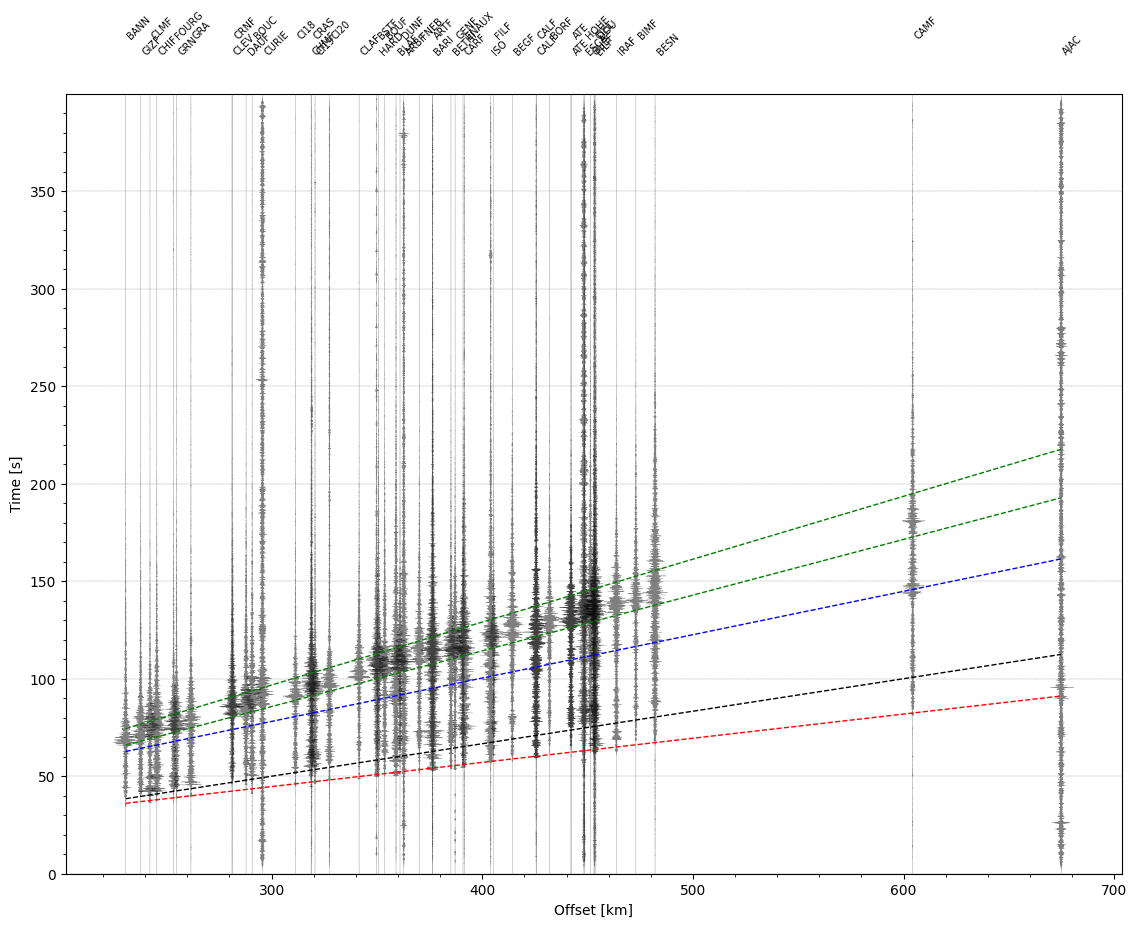

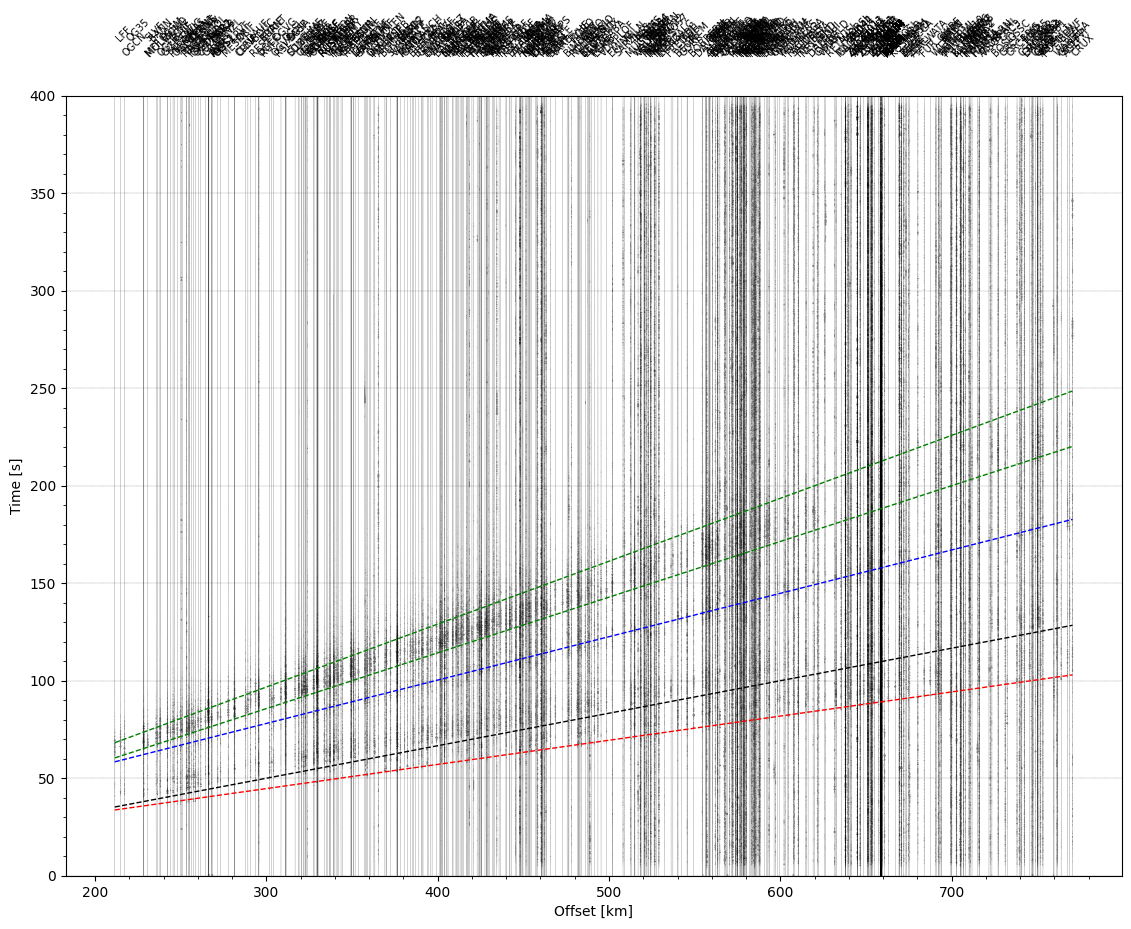

In [19]:

plot, st_Lg0 = plot_record_section(st_plot_filt_all[0:50], stations_all[0:50], eq_lat, eq_lon, eq_start, tracehodo=True, v_Lg_min=vLg_min, v_Lg_max=vLg_max, 
v_Pg=vPg)

plot, st_Lg1 = plot_record_section(st_plot_filt_all, stations_all, eq_lat, eq_lon, eq_start, tracehodo=True, v_Lg_min=vLg_min, v_Lg_max=vLg_max,v_Pg=vPg);

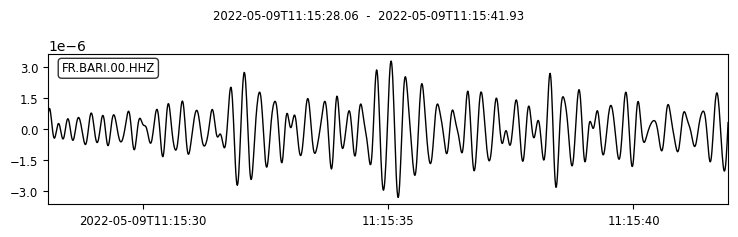

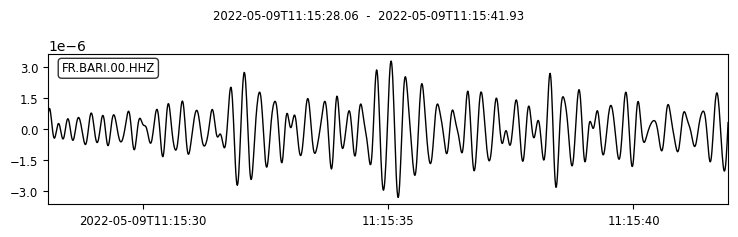

In [20]:
st_Lg1[10].plot()

In [58]:

stations_with_amps=calc_amps(stations_all, 
st_plot_filt_all, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max, tminCoda, tmaxCoda, Dtmin_Noise, Dtmax_Noise)

print(stations_with_amps.shape)

(470, 14)


In [59]:
wavecode='Lg_Pn'

In [60]:
#stations_with_amps: 
#net (0), sta (1), lat (2), lon (3), elev (4) , dist(5), az(6), 
# t_Pn (7), t_Sn (8), A_Pn (9), A_Sn (10), A_Lg(11), A_Coda(12), A_Noise(13)
distDraw=stations_with_amps[:,5].astype(float)/1000.
azDraw=stations_with_amps[:,6].astype(float) 

if wavecode == 'Pn' :
            Amp_Draw=stations_with_amps[:,9].astype(float)
if wavecode == 'Sn' :
            Amp_Draw=stations_with_amps[:,10].astype(float)
if wavecode == 'Lg' :
            Amp_Draw=stations_with_amps[:,11].astype(float)  
if wavecode == 'Coda' :
            Amp_Draw=stations_with_amps[:,12].astype(float)    
if wavecode == 'Noise' :
            Amp_Draw=stations_with_amps[:,13].astype(float) 
if wavecode == 'Lg_Coda' :
    Amp_Draw=np.divide(stations_with_amps[:,11].astype(float),stations_with_amps[:,12].astype(float))
if wavecode == 'Lg_Pn' :
    Amp_Draw=np.divide(stations_with_amps[:,11].astype(float),stations_with_amps[:,9].astype(float))
if wavecode == 'Lg_Sn' :
    Amp_Draw=np.divide(stations_with_amps[:,11].astype(float),stations_with_amps[:,10].astype(float))
if wavecode == 'Pn_Coda' :
    Amp_Draw=np.divide(stations_with_amps[:,9].astype(float),stations_with_amps[:,12].astype(float))
if wavecode == 'Sn_Coda' :
    Amp_Draw=np.divide(stations_with_amps[:,10].astype(float),stations_with_amps[:,12].astype(float))
if wavecode == 'Lg_Noise' :
    Amp_Draw=np.divide(stations_with_amps[:,11].astype(float),stations_with_amps[:,13].astype(float))
if wavecode == 'Coda_Noise' :
    Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,13].astype(float))
Amp_Draw[np.isnan(Amp_Draw)] = 0    
Amp_Draw[np.isinf(Amp_Draw)] = 0



/tmp/ipykernel_3140/4140446191.py:20: RuntimeWarning: invalid value encountered in divide
  Amp_Draw=np.divide(stations_with_amps[:,11].astype(float),stations_with_amps[:,9].astype(float))


In [61]:
#wavecode can take values of Lg, P, S, Coda, Lg_P, Lg_Coda

#plot_stations_amps(stations_with_amps, 1., 0.2, Amp_Draw, origin=[eq_lat,eq_lon], zoom=5)
plot_stations_amps(stations_with_amps, 1, 0.7, Amp_Draw, origin=[eq_lat,eq_lon], zoom=5, forcescale=False)

Massif Central_Lg_Pn.png


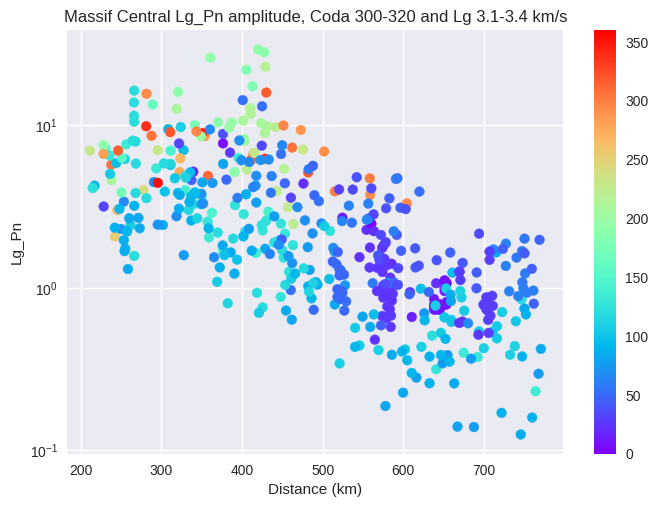

In [25]:
plt.style.use('seaborn-v0_8')
plt.scatter(distDraw, Amp_Draw,c=azDraw,cmap='rainbow',vmin=0, vmax=360.)
plt.colorbar()
plt.xlabel('Distance (km)')
plt.ylabel(wavecode)
plt.title(event_name+ ' ' + wavecode + ' amplitude, Coda 300-320 and Lg 3.1-3.4 km/s' )
#plt.title(event_name+ ' ' + wavecode + ' amplitude, Coda 2.1-2.3 and Lg 3.1-3.56 km/s' )

plt.yscale('log')

outfile=event_name+'_'+wavecode+'.png'

print(outfile)
#plt.savefig(outfile,format='png')

<Figure size 1000x1000 with 0 Axes>

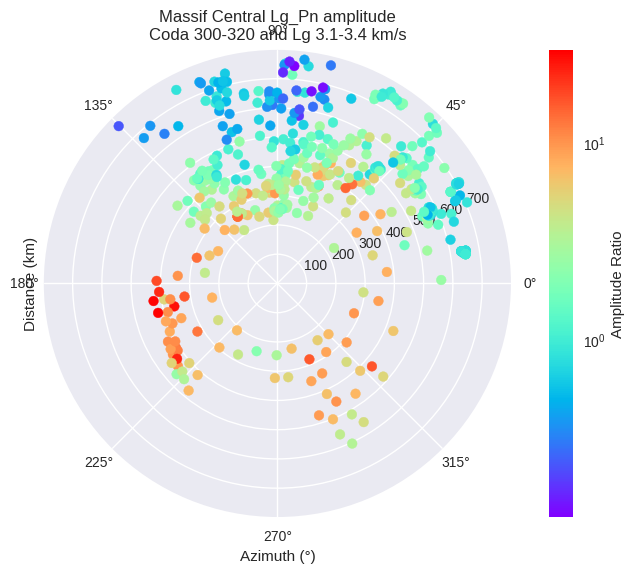

In [26]:

from matplotlib.colors import LogNorm
plt.figure(figsize=(10, 10))
plt.style.use('seaborn-v0_8')

theta = np.radians(azDraw)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
sc = ax.scatter(theta, distDraw, c=Amp_Draw, cmap='rainbow', norm=LogNorm())
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Amplitude Ratio')

fig.tight_layout()

# Labels
ax.set_xlabel('Azimuth (°)')
ax.set_ylabel('Distance (km)')
ax.set_title(f'{event_name} {wavecode} amplitude\nCoda 300-320 and Lg 3.1-3.4 km/s', va='bottom')
plt.savefig(f'{event_name}_{wavecode}_amplitude', format='png')
plt.show()


In [27]:
Q=900

#wavecode can take values of Lg, P, S, Coda, Lg_P, Lg_Coda
#normpower=3.3 memory stuff
 

powerfact=0. # for coda
powerfact=0.5
powerfact=5./6. # for Lg



#plot_stations_amps(stations_with_amps, 1., 0.8, Amp_Draw, origin=[eq_lat,eq_lon], 
#                       zoom=5, geom=True, geompower=powerfact,normQ=True,Q=Q,v=vLg,f0=f0)
plot_stations_amps(stations_with_amps, 1, 0.8, Amp_Draw, origin=[eq_lat,eq_lon], 
                       zoom=5, geom=True, geompower=powerfact,normQ=True,Q=Q,v=vLg,f0=f0, forcescale=False)

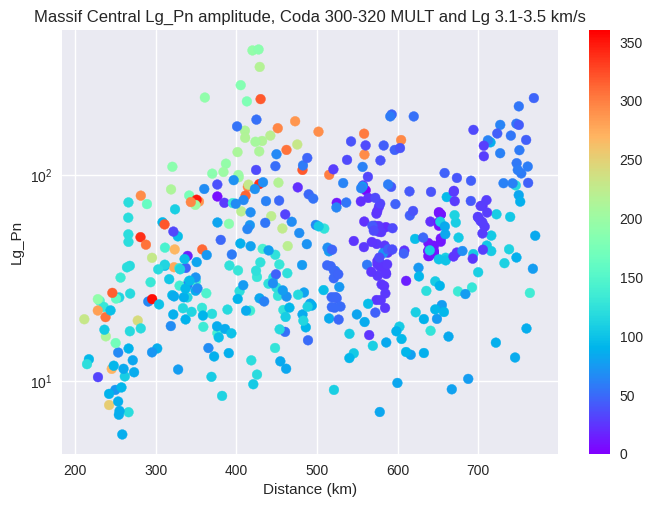

In [28]:
A0=1./np.power(200.,powerfact)
dist_power=A0*np.power(distDraw,powerfact)
Amp_Draw_power=np.multiply(Amp_Draw,dist_power)
multexp=np.pi*(f0/vLg/Q)
dist_exp=np.exp(multexp*distDraw)

Amp_Draw_exp=np.multiply(Amp_Draw_power,dist_exp)
amp_median=np.median(Amp_Draw_exp)
ymin=0.1*amp_median
ymax=10.*amp_median

plt.scatter(distDraw, Amp_Draw_exp,c=azDraw,cmap='rainbow',vmin=0, vmax=360.)
plt.colorbar()
plt.xlabel('Distance (km)')
plt.ylabel(wavecode)
plt.title(event_name+ ' ' + wavecode + ' amplitude, Coda 300-320 MULT and Lg 3.1-3.5 km/s' )
#plt.ylim([ymin, ymax])

plt.yscale('log')


<Figure size 1000x1000 with 0 Axes>

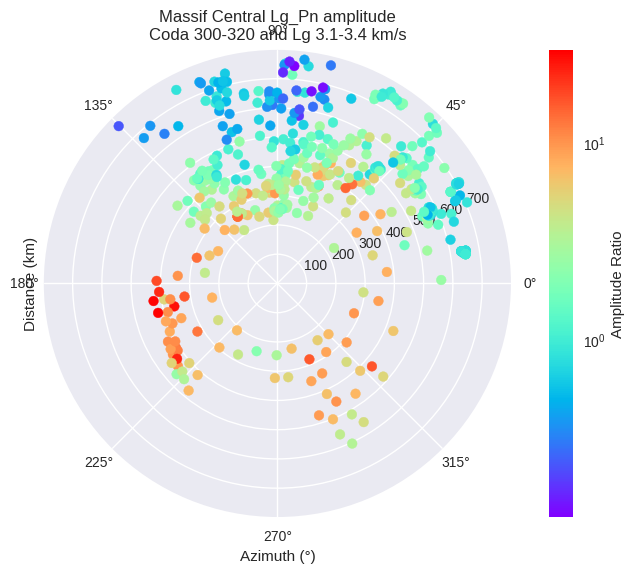

In [29]:
plt.figure(figsize=(10, 10))
plt.style.use('seaborn-v0_8')

theta = np.radians(azDraw)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
sc = ax.scatter(theta, distDraw,c=Amp_Draw, cmap='rainbow', norm=LogNorm())
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Amplitude Ratio')

fig.tight_layout()

# Labels
ax.set_xlabel('Azimuth (°)')
ax.set_ylabel('Distance (km)')
ax.set_title(f'{event_name} {wavecode} amplitude\nCoda 300-320 and Lg 3.1-3.4 km/s', va='bottom')
plt.savefig(f'{event_name}_{wavecode}_amplitude_Q_corrected', format='png')
plt.show()

#### Calculate spectral ratios of Phases
This is the same process as before, but this time the spectral ratios are taken. So a frequency window is introduced, and the amplitude of this frequency window is calculated in the Fourier space.

In [35]:
fmin = 3
fmax = 6
stations_with_spectral_amps=spectral_ratios(stations_all, 
st_plot_filt_all, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max, tminCoda, tmaxCoda, Dtmin_Noise, Dtmax_Noise, fmin, fmax)


(470, 14)


In [68]:
#stations_with_amps: 
#net (0), sta (1), lat (2), lon (3), elev (4) , dist(5), az(6), 
# t_Pn (7), t_Sn (8), A_Pn (9), A_Sn (10), A_Lg(11), A_Coda(12), A_Noise(13)


wavecode='Lg_Pn'
distDraw=stations_with_amps[:,5].astype(float)/1000.
azDraw=stations_with_amps[:,6].astype(float) 

if wavecode == 'Pn' :
            Amp_Draw=stations_with_amps[:,9].astype(float)
if wavecode == 'Sn' :
            Amp_Draw=stations_with_amps[:,10].astype(float)
if wavecode == 'Lg' :
            Amp_Draw=stations_with_amps[:,11].astype(float)  
if wavecode == 'Coda' :
            Amp_Draw=stations_with_amps[:,12].astype(float)    
if wavecode == 'Noise' :
            Amp_Draw=stations_with_amps[:,13].astype(float) 
if wavecode == 'Lg_Coda' :
    Amp_Draw=np.divide(stations_with_amps[:,11].astype(float),stations_with_amps[:,12].astype(float))
if wavecode == 'Lg_Pn' :
    Amp_Draw=np.divide(stations_with_amps[:,11].astype(float),stations_with_amps[:,9].astype(float))
if wavecode == 'Lg_Sn' :
    Amp_Draw=np.divide(stations_with_amps[:,11].astype(float),stations_with_amps[:,10].astype(float))
if wavecode == 'Pn_Coda' :
    Amp_Draw=np.divide(stations_with_amps[:,9].astype(float),stations_with_amps[:,12].astype(float))
if wavecode == 'Sn_Coda' :
    Amp_Draw=np.divide(stations_with_amps[:,10].astype(float),stations_with_amps[:,12].astype(float))
if wavecode == 'Lg_Noise' :
    Amp_Draw=np.divide(stations_with_amps[:,11].astype(float),stations_with_amps[:,13].astype(float))
if wavecode == 'Coda_Noise' :
    Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,13].astype(float))
Amp_Draw[np.isnan(Amp_Draw)] = 0    
Amp_Draw[np.isinf(Amp_Draw)] = 0



/tmp/ipykernel_3140/714210341.py:23: RuntimeWarning: invalid value encountered in divide
  Amp_Draw=np.divide(stations_with_amps[:,11].astype(float),stations_with_amps[:,9].astype(float))


In [69]:
plot_stations_amps(stations_with_amps, 1, 0.7, Amp_Draw, origin=[eq_lat,eq_lon], zoom=5, forcescale=False)

### Signal-to-Noise-ratio

In order to define the SNR correcly, a signal window is chosen. Different phases can be chosen, and the coda. As well as that different techniques to compute the SNR can be chosen (for now time amplitude).

In [107]:
SNR_method = 'time_amplitude'

stations_with_SNR = SNR(stations_all, 
    st_plot_filt_all, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max, tminCoda, tmaxCoda,
            Dtmin_Noise, Dtmax_Noise, method=SNR_method,signal_window='coda')
Amp_Draw=stations_with_SNR[:,9].astype(float)
Amp_Draw[np.isnan(Amp_Draw)] = 0    
Amp_Draw[np.isinf(Amp_Draw)] = 0
SNR_plot = plot_stations_amps(stations_with_SNR, 1, 0.7, Amp_Draw, origin=[eq_lat,eq_lon], zoom=5, forcescale=False)
SNR_plot

/tmp/ipykernel_3140/500677069.py:44: RuntimeWarning: divide by zero encountered in log10
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_3140/500677069.py:44: RuntimeWarning: invalid value encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_3140/500677069.py:44: RuntimeWarning: divide by zero encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)


/tmp/ipykernel_3140/500677069.py:44: RuntimeWarning: divide by zero encountered in log10
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_3140/500677069.py:44: RuntimeWarning: invalid value encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_3140/500677069.py:44: RuntimeWarning: divide by zero encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_3140/500677069.py:66: RuntimeWarning: invalid value encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_3140/500677069.py:66: RuntimeWarning: divide by zero encountered in log10
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_3140/500677069.py:66: RuntimeWarning: divide by zero encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_3140/500677069.py:77: RuntimeWarning: invalid value encountered in scalar divide
  snr = 10 * np.log10(signal_power / noi

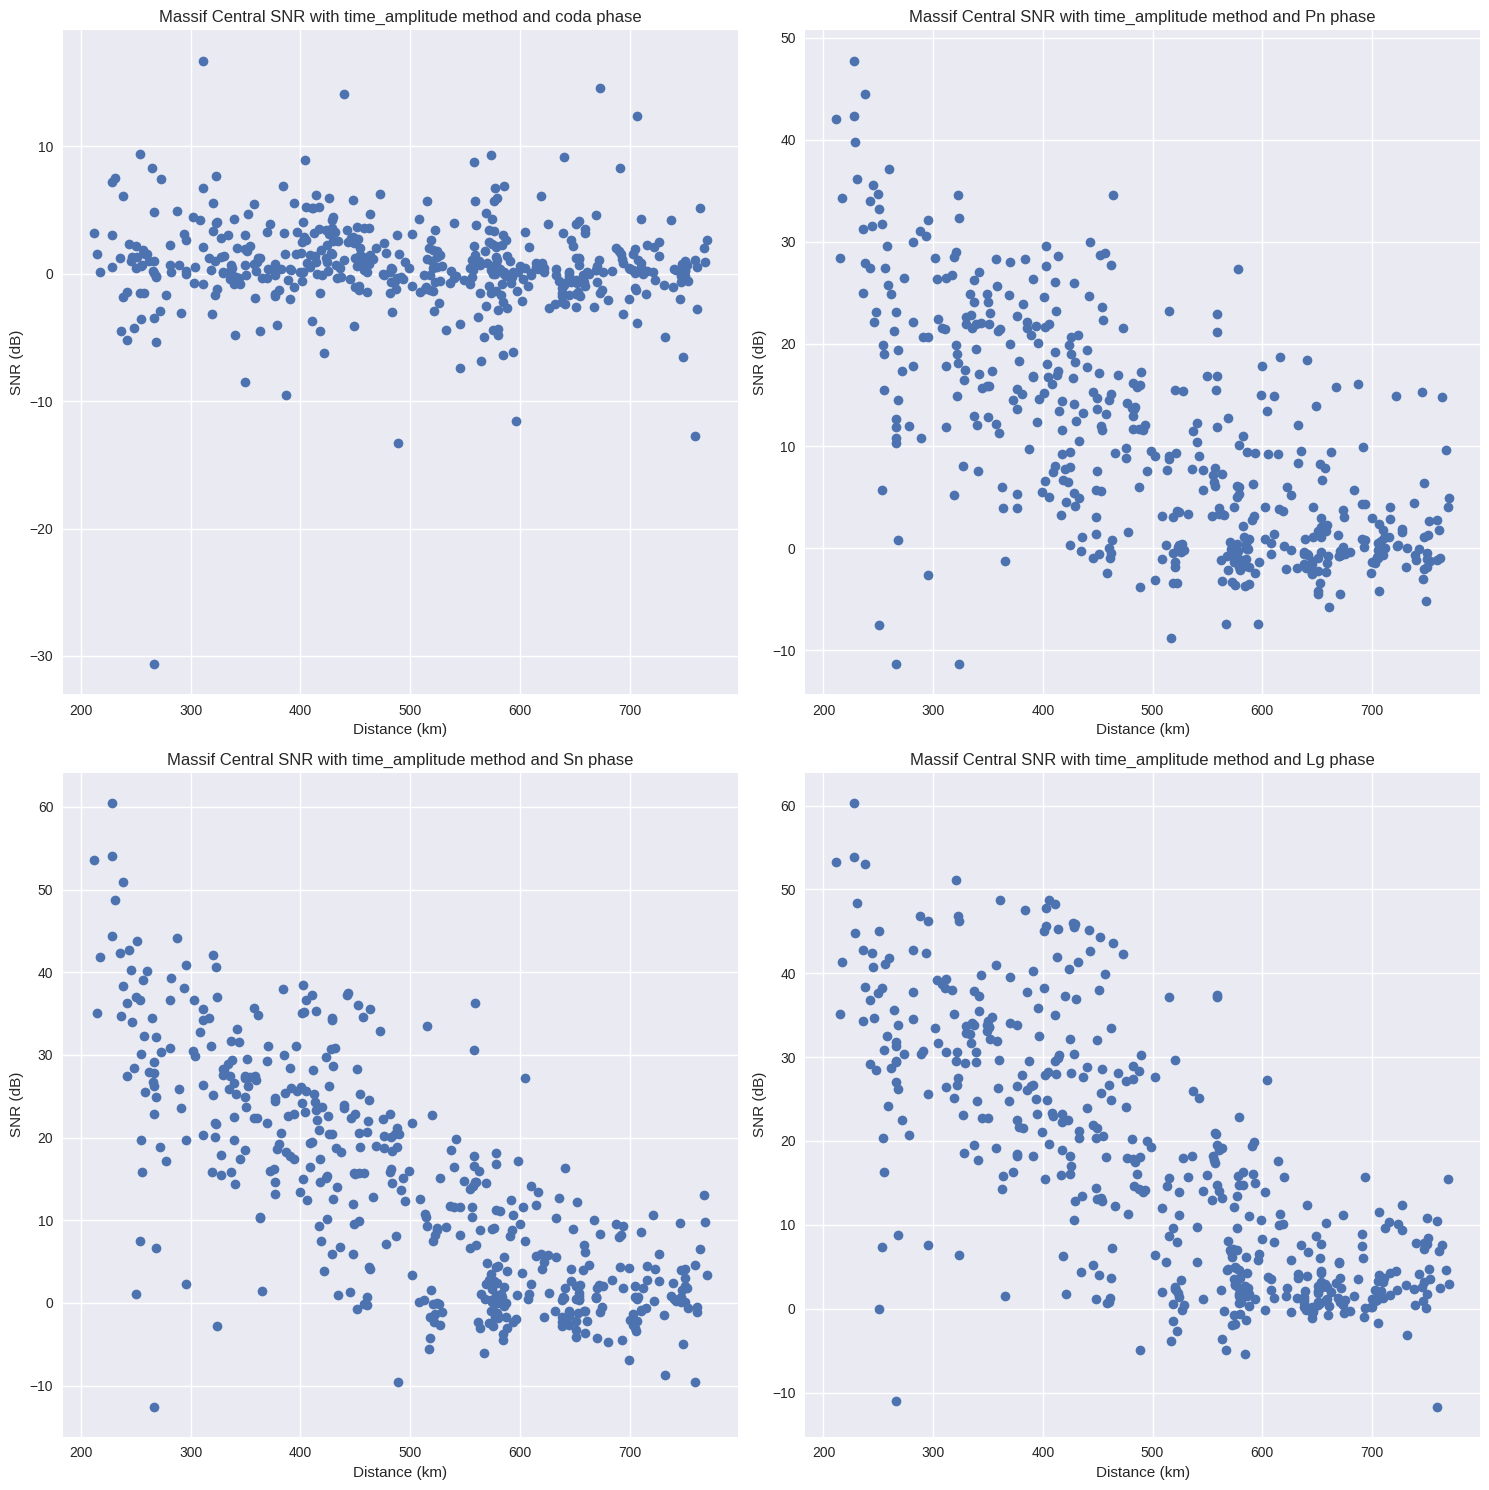

In [111]:
phases = ['coda','Pn', 'Sn', 'Lg']

for phase in phases:
    stations_with_SNR = SNR(stations_all, 
    st_plot_filt_all, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max, tminCoda, tmaxCoda,
            Dtmin_Noise, Dtmax_Noise, method=SNR_method,signal_window=phase)
    SNR_vals = stations_with_SNR[:,9].astype(float)
    dist_vals = stations_with_SNR[:,5].astype(float)/1000.

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
plt.style.use('seaborn-v0_8')

for i, phase in enumerate(phases):
    stations_with_SNR = SNR(stations_all, 
                            st_plot_filt_all, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, 
                            vLg_min, vLg_max, tminCoda, tmaxCoda, Dtmin_Noise, Dtmax_Noise, 
                            method=SNR_method, signal_window=phase)
    SNR_vals = stations_with_SNR[:,9].astype(float)
    dist_vals = stations_with_SNR[:,5].astype(float)/1000.
    
    ax = axs[i//2, i%2]
    ax.plot(dist_vals, SNR_vals, 'o')
    ax.set_xlabel('Distance (km)')
    ax.set_ylabel('SNR (dB)')
    ax.set_title(f'{event_name} SNR with {SNR_method} method and {phase} phase')

plt.tight_layout()
plt.show()
    











## Functions

In [3]:
def get_Pn_time(dist_deg) :

    from obspy.taup import TauPyModel

    model = TauPyModel(model='ak135') #crust at 35 (?) , but only 3s difference with 11km crust 
    t_Pn=111.*dist_deg/8.  #default value
    
    arrivals = model.get_travel_times(source_depth_in_km=0,
                                  distance_in_degree=dist_deg,phase_list=["Pn"])


    try:
        t_Pn=arrivals [0].time
    except Exception as e:
        print('no Pn ', dist_deg, e)

    return t_Pn

In [4]:
def get_Sn_time(dist_deg) :

    from obspy.taup import TauPyModel

    model = TauPyModel(model='ak135') #crust at 35 (?) , but only 3s difference with 11km crust 
    t_Sn=111.*dist_deg/8.  #default value
    
    arrivals = model.get_travel_times(source_depth_in_km=0,
                                  distance_in_degree=dist_deg,phase_list=["Sn"])


    try:
        t_Sn=arrivals [0].time
    except Exception as e:
        print('no Sn ', dist_deg, e)

    return t_Sn

In [5]:
import os
from obspy import read

def get_data(client, inventory, start, end, distmin, distmax,directory='/home/schreinl/Stage/Data/'):
    """
    -function that downloads data from given client and inventory for a given time window
    -filters the stations based on their location
    -checks if data is already downloaded and reads it from disk if it is
    -gives back stream with all the data {st_final_target}, as well as a list of stations and their metadata,
      including expected arrival times of Pn and Sn {stations_target}
    """
    logfile = []
    #initialize variables
    stations_target = []
    time_string = UTCDateTime.strftime(start, format="%Y_%m_%dT%H_%M_%S")
    priorities = ["BHZ", "HHZ", "SHZ"]
    stat_count = 0
    st_final_target = None
    
    #create target directory
    target_directory = f'{directory}{time_string}' #format /../
    if not os.path.exists(target_directory):
        os.makedirs(target_directory)

    for network in inventory:
        for station in network.stations:
            #calculate distance between station and earthquake
            epi_dist, az, baz = gps2dist_azimuth(eq_lat, eq_lon, station.latitude, station.longitude)
            epi_dist_deg = epi_dist / 1000 / 111. 
            
            #check if station is in the desired distance range
            if distmin < epi_dist_deg < distmax:
                prio = [0, 0, 0]
                for location in station:
                    if location.code == priorities[0]: prio[0] = 1
                    if location.code == priorities[1]: prio[1] = 1
                    if location.code == priorities[2]: prio[2] = 1
                
                #create filepath for each channel
                chan_to_get = priorities[prio.index(1)]
                filename = f'{network.code}_{station.code}_{chan_to_get}_{time_string}.mseed'
                file_path = os.path.join(target_directory, filename)
                
                #if given channel already exists on disk, read it from there
                if os.path.exists(file_path):
                    print(f"Reading from disk: {file_path}")
                    st = read(file_path)
                    conv_step = True 
                else:
                    #if it does not exist, download it from the client
                    try:
                        st = client.get_waveforms(
                            network.code,
                            station.code,
                            "*",
                            chan_to_get,
                            starttime=start,
                            endtime=end,
                            attach_response=False
                        )
                        #deconcolve with instrument response and store
                        st_prec, conv_step = preproc_single(st, inventory)
                        st_prec.write(file_path, format="MSEED")
                        st = st_prec
                        print(f"Downloaded: {file_path}")
                    except Exception as e:
                        print('No data for', station.code, e)
                        continue 
                #if data is available, calculate expected arrival times of Pn and Sn, and store 
                if conv_step:
                    t_Pn = get_Pn_time(epi_dist_deg)
                    t_Sn = get_Sn_time(epi_dist_deg)
                    stations_target.append([network.code, station.code, station.latitude, station.longitude, 
                                            station.elevation, epi_dist, az, t_Pn, t_Sn])
                    stat_count += 1

                    #handle cases where st_final_target is None
                    if st_final_target is None:
                        st_final_target = st.copy()
                    else:
                        st_final_target += st
    #if no data is available at all, return None Stream
    if st_final_target is None:
        from obspy import Stream
        st_final_target = Stream()

    return st_final_target, stations_target


In [6]:
def big_downloader(datacenters, start, end, distmin, distmax, directory='/home/schreinl/Stage/Data/',plot=False):
    """
    -input: list of datacenters type str, start and end time of the time window, minimum and maximum distance in degrees
    -function that downloads data from multiple datacenters
    -filters the stations based on their location
    -checks if data is already downloaded and reads it from disk if it is
    -possibility to plot the filtered stations
    -gives back stream with all the data {st_final_target}, as well as a list of stations and their metadata,
      including expected arrival times of Pn and Sn {stations_target}
    """

    #hardcoded for now the box values of stations
    minlat_st=40.
    maxlat_st=52
    minlon_st=-5            
    maxlon_st=16
    st_final_target = None
    logfile_combined = []
    st_final_stations = []
    #create inventory for each datacenter
    for i in range(len(datacenters)):
        client = Client(datacenters[i])
        logfile_center = []
        inventory=client.get_stations(
                        network="*",station="*",channel="HHZ,BHZ,SHZ",
                        location="*",starttime=start,endtime= end,
                        minlatitude=minlat_st,maxlatitude=maxlat_st,
                        minlongitude=minlon_st,maxlongitude=maxlon_st,
                        level="response")
        #get data for each datacenter
        st_final_center, stations_center = get_data(client, inventory, start, end, distmin, distmax, directory='/home/schreinl/Stage/Data/')
        if st_final_target is None:
            st_final_target = st_final_center
        else:
            st_final_target += st_final_center
        st_final_stations += stations_center
    #plotting option
    if plot:
        filtered_stations = folium.Map(location=[eq_lat,eq_lon],zoom_start=5)
            
        for station in st_final_stations:
            folium.RegularPolygonMarker(
                location=[station[2], station[3]],
                tooltip=f"{station[0]}.{station[1]}",
                color="red",
                fill=True,
                number_of_sides=3,
                radius=3,
                rotation=30,
            ).add_to(filtered_stations)
        return st_final_target, st_final_stations, filtered_stations


    return st_final_target, st_final_stations, None




#example usage
#clients = ['RESIF', 'ETH', 'INGV', 'ODC']
#test_st, test_stations, filtered_stations = big_downloader(clients, start, end, degmin, degmax, plot=True)
#filtered_stations

In [7]:
def preproc_single(st,inv) :
    st_work=st.copy()
    st_work=st_work.detrend("linear")
    st_work.taper(max_percentage=0.02)
    conv_step=True
    try :
        st_work.remove_response(output="VEL", water_level=10, inventory=inv)   
    except Exception as e:
        conv_step=False
        print(st,conv_step)
    return st_work, conv_step

In [8]:
def plot_record_section(
    st, stations, eq_lat, eq_lon, eq_start, size=(1200, 1000), show=True, outfile=None, tracehodo=True, v_Lg_min=3.1, v_Lg_max=3.5, 
v_Pg=6.):

    if not st or not stations:
        print("Station or stream empty.")
        return
    st2 = Stream()
    
 # create stream corresponding to the stations in matrix stations. 
    station_array=np.array(stations)

    dist_work=station_array[:,5].astype(float)/1000.
    t_Pn_work=station_array[:,7].astype(float)
    t_Sn_work=station_array[:,8].astype(float)
    dist_index=np.argsort(dist_work)
    dist_sectplot=dist_work[dist_index]
    t_Pn_plot=t_Pn_work[dist_index]
    t_Sn_plot=t_Sn_work[dist_index]
    t_Lg_min_plot=dist_sectplot/v_Lg_max
    t_Lg_max_plot=dist_sectplot/v_Lg_min
    t_Pg_plot=dist_sectplot/v_Pg
    

    for tr in st:
        for net, sta, lat, lon, elev , dist, az, t_Pn, t_Sn in stations:
            # We keep traces with a corresponding station only:
            if tr.stats.network == net and tr.stats.station == sta:
                tr.stats.coordinates = {"latitude": lat, "longitude": lon}
                tr.stats.distance = dist
                st2.append(tr)  

    # Plot the section:
    figure = plt.figure(figsize=(size[0] // 100, size[1] // 100))
    if len(st2) < 2:
        print("Cannot build plot section with less than two traces.\n")
        return

    begin = min(tr.stats.starttime for tr in st2)
    st2.trim(starttime=begin, pad=True, fill_value=0)

    st2.plot(type="section", linewidth=0.25, grid_linewidth=0.25, fig=figure, norm_method='trace')
    ax = figure.axes[0]

    ds = [(tr.stats.distance, tr.stats.station) for tr in st2]
    ds.sort()
    for n, (dist, sta) in enumerate(ds):
        # to avoid merged titles
        ycoord = 1.05 if (n + 1) % 2 == 0 else 1.07
        ax.text(dist / 1e3, ycoord * ax.get_ylim()[1], sta, fontsize=7, rotation=45)
    if tracehodo == True :
        plt.plot(dist_sectplot, t_Pn_plot, color='r', linestyle='dashed',linewidth=1)
        plt.plot(dist_sectplot, t_Sn_plot, color='b', linestyle='dashed',linewidth=1)
        plt.plot(dist_sectplot, t_Lg_min_plot, color='g', linestyle='dashed',linewidth=1)
        plt.plot(dist_sectplot, t_Lg_max_plot, color='g', linestyle='dashed',linewidth=1)
        plt.plot(dist_sectplot, t_Pg_plot, color='k', linestyle='dashed',linewidth=1)
        st_Lg = Stream()
        for tr in st2:
            dist = tr.stats.distance / 1000.0
            t_Lg_min = dist / v_Lg_max
            t_Lg_max = dist / v_Lg_min
            tr_Lg = tr.copy().trim(starttime=eq_start + t_Lg_min, endtime=eq_start + t_Lg_max)
            st_Lg.append(tr_Lg)
        
            
    
    if outfile:
        plt.savefig(outfile)
    elif show:
        plt.show()
    return figure, st_Lg

For the signal to noise ratio a method has to be settled on. Either in the time domain part of the signal will be defined over background noise, where a part of the signal has to be taken that is rather equal for the different stations and does not depend on geological features so much. Here different phases can be considered, or the coda (like in campillo 2003). The signal to noise ratio is defined as $SNR = np.sum(signal^2) / np.sum(noise^2)$.

In [104]:
def SNR(stations, st, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max, tmin_Coda, tmax_Coda,
         Dtmin_Noise, Dtmax_Noise,fmin=3, fmax=6, method='time_amplitude',signal_window='coda',plot_map=False):

    

    SNR = []
    if method == 'time_amplitude':
        for net, sta, lat, lon, elev , dist, az, t_Pn, t_Sn  in stations:
            A_Noise=0.
            A_Pn=0.
            A_Sn=0.
            A_Lg=0.
            A_Coda=0.
            A_LgAP=0.
            A_LgACoda=0.
            tmin_Noise=t_Pn+Dtmin_Noise
            tmax_Noise=t_Pn+Dtmax_Noise
            tmin_Pn=t_Pn+Dtmin_Pn
            tmax_Pn=t_Pn+Dtmax_Pn
            tmin_Sn=t_Sn+Dtmin_Sn
            tmax_Sn=t_Sn+Dtmax_Sn
            

            for tr in st :
                if tr.stats.network == net and tr.stats.station == sta:
                    tminLg=dist/1000/vLg_max
                    tmaxLg=dist/1000/vLg_min
                    trace_start=tr.stats.starttime - eq_start
                    dt=tr.stats.delta
                    nt=tr.stats.npts
                    trace_end=trace_start+dt*(nt-1)
                    tvector=np.arange(trace_start,trace_end+dt,dt)
                    datavector=tr.data
                
                    if signal_window == 'coda':
                        iminCoda=int((tmin_Coda-trace_start)/dt)
                        imaxCoda=int((tmax_Coda-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectCoda=(datavector[iminCoda:imaxCoda])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])                        
                        signal_power = np.sum(np.abs(dataselectCoda)**2) 
                        noise_power = np.sum(np.abs(dataselectNoise)**2)
                        snr = 10 * np.log10(signal_power / noise_power)

                    if signal_window == 'Lg':
                        iminLg=int((tminLg-trace_start)/dt)
                        imaxLg=int((tmaxLg-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectLg=(datavector[iminLg:imaxLg])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])                        
                        signal_power = np.sum(np.abs(dataselectLg)**2) 
                        noise_power = np.sum(np.abs(dataselectNoise)**2)
                        snr = 10 * np.log10(signal_power / noise_power)

                    if signal_window == 'Pn':
                        iminPn=int((tmin_Pn-trace_start)/dt)
                        imaxPn=int((tmax_Pn-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectPn=(datavector[iminPn:imaxPn])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])                        
                        signal_power = np.sum(np.abs(dataselectPn)**2) 
                        noise_power = np.sum(np.abs(dataselectNoise)**2)
                        snr = 10 * np.log10(signal_power / noise_power)
                    
                    if signal_window == 'Sn':
                        iminSn=int((tmin_Sn-trace_start)/dt)
                        imaxSn=int((tmax_Sn-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectSn=(datavector[iminSn:imaxSn])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])
                        signal_power = np.sum(np.abs(dataselectSn)**2)
                        noise_power = np.sum(np.abs(dataselectNoise)**2)
                        snr = 10 * np.log10(signal_power / noise_power)
                        
            SNR.append([snr])
        stations_with_SNR=np.append(np.array(stations),np.array(SNR),axis=1)

        if plot_map==True:
            Amp_Draw=stations_with_SNR[:,9].astype(float)
            Amp_Draw[np.isnan(Amp_Draw)] = 0    
            Amp_Draw[np.isinf(Amp_Draw)] = 0
            plotit =plot_stations_amps(stations_with_SNR, 1, 0.7, Amp_Draw, origin=[eq_lat,eq_lon], zoom=5, forcescale=False)
            plotit


        return stations_with_SNR





stations_with_SNR = SNR(stations_all, 
st_plot_filt_all, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max, tminCoda, tmaxCoda,
         Dtmin_Noise, Dtmax_Noise, method='time_amplitude',signal_window='coda',plot_map=True)

               

/tmp/ipykernel_3140/500677069.py:44: RuntimeWarning: divide by zero encountered in log10
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_3140/500677069.py:44: RuntimeWarning: invalid value encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)
/tmp/ipykernel_3140/500677069.py:44: RuntimeWarning: divide by zero encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)


In [65]:
def calc_amps(stations, st, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max, tmin_Coda, tmax_Coda, Dtmin_Noise, Dtmax_Noise):


    stations_amplitudes=[]
    for net, sta, lat, lon, elev , dist, az, t_Pn, t_Sn  in stations:
        A_Noise=0.
        A_Pn=0.
        A_Sn=0.
        A_Lg=0.
        A_Coda=0.
        A_LgAP=0.
        A_LgACoda=0.
        tmin_Noise=t_Pn+Dtmin_Noise
        tmax_Noise=t_Pn+Dtmax_Noise
        tmin_Pn=t_Pn+Dtmin_Pn
        tmax_Pn=t_Pn+Dtmax_Pn
        tmin_Sn=t_Sn+Dtmin_Sn
        tmax_Sn=t_Sn+Dtmax_Sn

        for tr in st :
            if tr.stats.network == net and tr.stats.station == sta:
                tminLg=dist/1000/vLg_max
                tmaxLg=dist/1000/vLg_min
                trace_start=tr.stats.starttime - eq_start
                dt=tr.stats.delta
                nt=tr.stats.npts
                trace_end=trace_start+dt*(nt-1)
                tvector=np.arange(trace_start,trace_end+dt,dt)
                datavector=tr.data
            
                if (trace_start<tmin_Pn) and (trace_end>tmax_Pn) :
                    iminPn=int((tmin_Pn-trace_start)/dt)
                    imaxPn=int((tmax_Pn-trace_start)/dt)
                    dataselectPn=(datavector[iminPn:imaxPn])
                    A_Pn=np.sqrt(np.dot(dataselectPn,np.transpose(dataselectPn)))/len(dataselectPn)
                if (trace_start<tmin_Sn) and (trace_end>tmax_Sn) :
                    iminSn=int((tmin_Sn-trace_start)/dt)
                    imaxSn=int((tmax_Sn-trace_start)/dt)
                    dataselectSn=(datavector[iminSn:imaxSn])
                    A_Sn=np.sqrt(np.dot(dataselectSn,np.transpose(dataselectSn)))/len(dataselectSn)
                if (trace_start<tminLg) and (trace_end>tmaxLg) :
                    iminLg=int((tminLg-trace_start)/dt)
                    imaxLg=int((tmaxLg-trace_start)/dt)
                    dataselectLg=(datavector[iminLg:imaxLg])
                    A_Lg=np.sqrt(np.dot(dataselectLg,np.transpose(dataselectLg)))/len(dataselectLg)
                if (trace_start<tmin_Coda) and (trace_end>tmax_Coda) :
                    iminCoda=int((tmin_Coda-trace_start)/dt)
                    imaxCoda=int((tmax_Coda-trace_start)/dt)
                    dataselectCoda=(datavector[iminCoda:imaxCoda])
                    A_Coda=np.sqrt(np.dot(dataselectCoda,np.transpose(dataselectCoda)))/len(dataselectCoda)
                if (trace_start<tmin_Noise) and (trace_end>tmax_Noise) :
                    iminNoise=int((tmin_Noise-trace_start)/dt)
                    imaxNoise=int((tmax_Noise-trace_start)/dt)
                    dataselectNoise=(datavector[iminNoise:imaxNoise])
                    A_Noise=np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)

    
        stations_amplitudes.append([A_Pn, A_Sn, A_Lg, A_Coda, A_Noise])


    stations_with_amps=np.append(np.array(stations),np.array(stations_amplitudes),axis=1)

    return stations_with_amps
        

In [66]:
from obspy.signal.filter import bandpass

def spectral_ratios(stations, st, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max, tmin_Coda, tmax_Coda, Dtmin_Noise, Dtmax_Noise, fmin,fmax):
    stations_amplitudes=[]
    
    for net, sta, lat, lon, elev , dist, az, t_Pn, t_Sn  in stations:
        A_Noise=0.
        A_Pn=0.
        A_Sn=0.
        A_Lg=0.
        A_Coda=0.
        A_LgAP=0.
        A_LgACoda=0.
        tmin_Noise=t_Pn+Dtmin_Noise
        tmax_Noise=t_Pn+Dtmax_Noise
        tmin_Pn=t_Pn+Dtmin_Pn
        tmax_Pn=t_Pn+Dtmax_Pn
        tmin_Sn=t_Sn+Dtmin_Sn
        tmax_Sn=t_Sn+Dtmax_Sn

        for tr in st :
            if tr.stats.network == net and tr.stats.station == sta:
                tminLg=dist/1000/vLg_max
                tmaxLg=dist/1000/vLg_min
                trace_start=tr.stats.starttime - eq_start
                dt=tr.stats.delta
                nt=tr.stats.npts
                trace_end=trace_start+dt*(nt-1)
                tvector=np.arange(trace_start,trace_end+dt,dt)
                datavector=tr.data
                
                if (trace_start<tmin_Pn) and (trace_end>tmax_Pn) :
                    iminPn=int((tmin_Pn-trace_start)/dt)
                    imaxPn=int((tmax_Pn-trace_start)/dt)
                    dataselectPn=(datavector[iminPn:imaxPn])
                    filtered_dataselectPn = bandpass(dataselectPn, fmin, fmax, df=1/dt, corners=4, zerophase=True)
                    filteredPn_ft = np.fft.fft(filtered_dataselectPn)
                    A_Pn=np.sqrt(np.dot(filteredPn_ft,np.transpose(filteredPn_ft)))/len(filteredPn_ft)
                if (trace_start<tmin_Sn) and (trace_end>tmax_Sn) :
                    iminSn=int((tmin_Sn-trace_start)/dt)
                    imaxSn=int((tmax_Sn-trace_start)/dt)
                    dataselectSn=(datavector[iminSn:imaxSn])
                    filtered_dataselectSn = bandpass(dataselectSn, fmin, fmax, df=1/dt, corners=4, zerophase=True)
                    filteredSn_ft = np.fft.fft(filtered_dataselectSn)
                    A_Sn=np.sqrt(np.dot(filteredSn_ft,np.transpose(filteredSn_ft)))/len(filteredSn_ft)
                if (trace_start<tminLg) and (trace_end>tmaxLg) :
                    iminLg=int((tminLg-trace_start)/dt)
                    imaxLg=int((tmaxLg-trace_start)/dt)
                    dataselectLg=(datavector[iminLg:imaxLg])
                    filtered_dataselectLg = bandpass(dataselectLg, fmin, fmax, df=1/dt, corners=4, zerophase=True)
                    filteredLg_ft = np.fft.fft(filtered_dataselectLg)
                    A_Lg=np.sqrt(np.dot(filteredLg_ft,np.transpose(filteredLg_ft)))/len(filteredLg_ft)
                if (trace_start<tmin_Coda) and (trace_end>tmax_Coda) :
                    iminCoda=int((tmin_Coda-trace_start)/dt)
                    imaxCoda=int((tmax_Coda-trace_start)/dt)
                    dataselectcoda=(datavector[iminCoda:imaxCoda])
                    filtered_dataselectcoda = bandpass(dataselectcoda, fmin, fmax, df=1/dt, corners=4, zerophase=True)
                    filteredcoda_ft = np.fft.fft(filtered_dataselectcoda)
                    A_Coda=np.sqrt(np.dot(filteredcoda_ft,np.transpose(filteredcoda_ft)))/len(filteredcoda_ft)
                if (trace_start<tmin_Noise) and (trace_end>tmax_Noise) :
                    iminNoise=int((tmin_Noise-trace_start)/dt)
                    imaxNoise=int((tmax_Noise-trace_start)/dt)
                    dataselectNoise=(datavector[iminNoise:imaxNoise])
                    filtered_dataselectNoise = bandpass(dataselectNoise, fmin, fmax, df=1/dt, corners=4, zerophase=True)
                    filteredNoise_ft = np.fft.fft(filtered_dataselectNoise)
                    A_Noise=np.sqrt(np.dot(filteredNoise_ft,np.transpose(filteredNoise_ft)))/len(filteredNoise_ft)

    
        stations_amplitudes.append([A_Pn, A_Sn, A_Lg, A_Coda, A_Noise])


    stations_with_amps=np.append(np.array(stations),np.array(stations_amplitudes),axis=1)

    return stations_with_amps

In [67]:
def plot_stations_amps(stations_amps, amin, amax, Amp_Draw, origin=[0, 0], zoom=4, color="red", geom=False, 
                       geompower=0.5, normQ=False, Q=1000, f0=1, v=3.4, forcescale=False, outfile=None):
    import branca.colormap as cm

    stations_with_amps_list=stations_with_amps.tolist()    

    
    plot_amp=Amp_Draw
    distwork=stations_with_amps[:,5].astype(float)/1000.
    
    if geom == True :
            A0=1./np.power(200.,geompower)
            dist_power=A0*np.power(distwork,geompower)
    else:
            dist_power=1+0.*distwork
            
    if normQ == True:
            multexp=np.pi*(f0/v/Q)
            dist_exp=np.exp(multexp*distwork)
    else:
            dist_exp=1+0.*distwork
    
    plot_amp=np.multiply(plot_amp,dist_power)
    plot_amp=np.multiply(plot_amp,dist_exp)
        
#    linear = cm.linear.RdYlGn_04.scale(amin, amax)
    linear = cm.LinearColormap(["green", "yellow", "red"], vmin=amin*min(plot_amp), vmax=amax*max(plot_amp))
    if forcescale :
            linear = cm.LinearColormap(["green", "yellow", "red"], vmin=amin, vmax=amax)
    carte = folium.Map(location=origin, zoom_start=zoom)
    
    istat=-1
    for net, sta, lat, lon, elev, dist, az, t_Pn, t_Sn, A_Pn, A_Sn, A_Lg, A_Coda, A_Noise in stations_with_amps_list:
        istat=istat+1        
        name = ".".join([net, sta])
        infos = "%s (%s, %s) %s m" % (name, lat, lon, elev)
        folium.CircleMarker(
            location=[lat, lon],
            tooltip=infos,         
            fill=True,
            fill_opacity=1.0,
            color=linear(plot_amp[istat]), 
            radius=4,
        ).add_to(carte)

    
    folium.CircleMarker(
        location=origin,
        radius=5,
        color='blue',
        fill=True,
        fill_color="#FF8C00",
        ).add_to(carte)
    
    if outfile:
        carte.save(outfile)
    #        webbrowser.open(outfile, new=2, autoraise=True)
    #        time.sleep(1)
    return carte
